# Exploratory Data Analysis


- Visualization and finding hidden insights from the data

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df=pd.read_csv('ZOMATO_INDIA.csv')

In [3]:
df.shape

(55568, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55568 entries, 0 to 55567
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   res_id                55568 non-null  int64  
 1   name                  55568 non-null  object 
 2   establishment         55568 non-null  object 
 3   city                  55568 non-null  object 
 4   city_id               55568 non-null  int64  
 5   locality              55568 non-null  object 
 6   latitude              55568 non-null  float64
 7   longitude             55568 non-null  float64
 8   cuisines              55568 non-null  object 
 9   average_cost_for_two  55568 non-null  int64  
 10  price_range           55568 non-null  int64  
 11  highlights            55568 non-null  object 
 12  aggregate_rating      55568 non-null  float64
 13  rating_text           55568 non-null  object 
 14  votes                 55568 non-null  int64  
 15  delivery           

In [5]:
df.describe()

res_id       city_id      latitude     longitude  \
count  5.556800e+04  55568.000000  55568.000000  55568.000000   
mean   1.313694e+07   3409.499298     21.450847     76.497131   
std    8.105959e+06   5174.942737     42.901135     10.982976   
min    5.000000e+01      1.000000      0.000000      0.000000   
25%    3.001352e+06      8.000000     16.518374     74.645885   
50%    1.869268e+07     26.000000     22.468629     77.106348   
75%    1.887262e+07  11294.000000     26.752959     79.831641   
max    1.915979e+07  11354.000000  10000.000000     91.832769   

       average_cost_for_two   price_range  aggregate_rating         votes  \
count          55568.000000  55568.000000      55568.000000  55568.000000   
mean             528.205874      1.714728          2.958593    223.330352   
std              595.028447      0.878227          1.464576    618.224019   
min                0.000000      1.000000          0.000000    -18.000000   
25%              200.000000      1.000000          2.900000      6.000000   
50%              350.000000      1.000000          3.500000     35.000000   
75%              600.000000      2.000000          3.900000    175.000000   
max            30000.000000      4.000000          4.900000  42539.000000   

       No. of Cuisines  
count     55568.000000  
mean          2.235711  
std           1.329704  
min           1.000000  
25%           1.000000  
50%           2.000000  
75%           3.000000  
max           8.000000

# Lets figure out what is the distribution of the data of each column.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

%matplotlib inline

### Establishment Type

In [7]:
fig = px.bar(data_frame = df, 
             x = df['establishment'].value_counts().index, 
             y = df['establishment'].value_counts(), 
             color = df['establishment'].value_counts().index, 
             labels = {'x':'cuisines Type', 'y':'No. of cuisines Type'},
             title = 'Cuisines Types')

fig.update_layout(showlegend=False)

##### Most of the cafes belong to establishment type `QUICK BITES`.around 15.86K, whereas the `Casual Dinning` has 12.27K, `cafe` has around 4.1K.

## Cities

In [8]:
df_city=df.groupby('city')[['name']].count().reset_index()

In [9]:
df_city.columns=['city','Restaurant_Count']
df_city.head()

city  Restaurant_Count
0       Agra               833
1  Ahmedabad              1247
2      Ajmer               400
3  Alappuzha               255
4  Allahabad               547

In [10]:
df_city=df_city.sort_values(by='Restaurant_Count')

In [11]:
px.bar(data_frame = df,
      x = df_city['city'],
      y = df_city['Restaurant_Count'], 
      color = df_city['Restaurant_Count'], 
      labels = {'x':'Cities', 'y':'Restaurant_Count'}, 
       title = 'No. of Restaurant in city')

In [12]:
px.bar(data_frame=df,
      x=df['city'].value_counts()[:10].index,
      y=df['city'].value_counts()[:10],
      color=df['city'].value_counts()[:10].index,
      labels = {'x':'Cities', 'y':'Restaurant_Count'}, 
       title = 'Top 10 cities with maximum cafes')

## Price Range Distribution

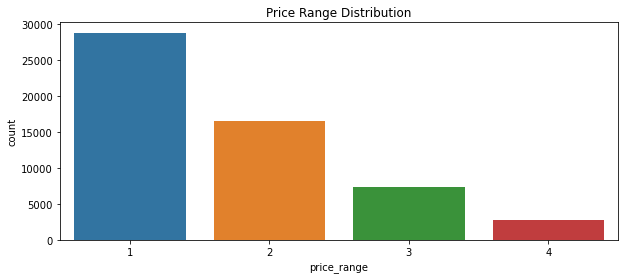

In [13]:
plt.figure(figsize=(10,4))
sns.countplot(x='price_range',data=df)
plt.title('Price Range Distribution')
plt.show()

##### Most of the cafes are cheaper and have price range `0 to 500`

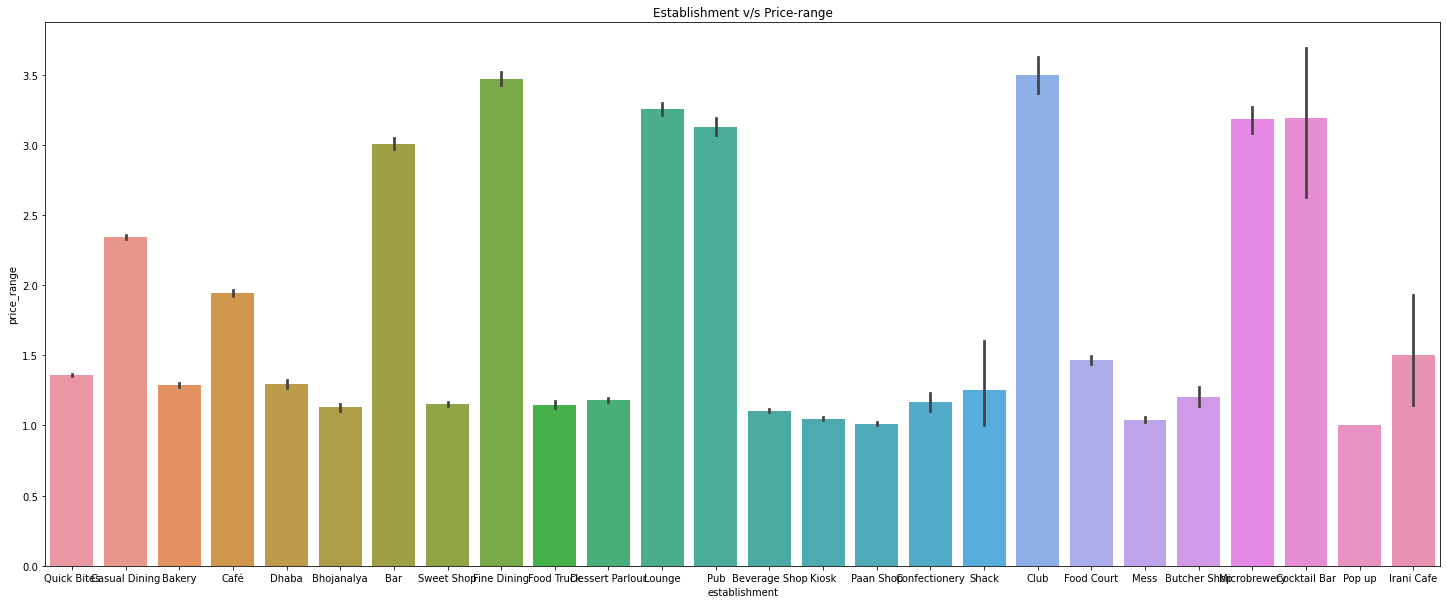

In [14]:
plt.figure(figsize=(25,10))
sns.barplot(x='establishment',y='price_range',data=df)
plt.title('Establishment v/s Price-range')
plt.show()

##### As per the above plot, Cafes like `Bar, Fine Dining, Lounge, Pub, Club, Cocktail Bar` have higher price range as compared to other type of cafes

## Number of Cuisines

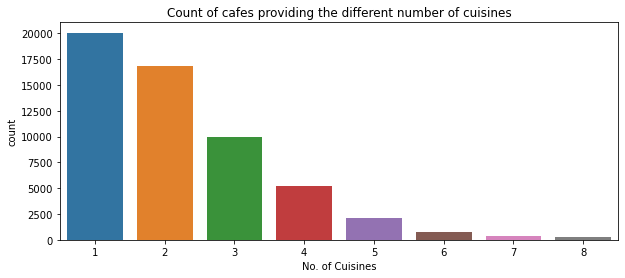

In [15]:
plt.figure(figsize=(10,4))
sns.countplot(x='No. of Cuisines',data=df)
plt.title('Count of cafes providing the different number of cuisines')
plt.show()

##### The cafes providing less number of cuisines are more in number .
Lets see which cuisine is the most popular.

In [16]:
px.bar(x=df['cuisines'].value_counts()[0:10].index,
      y=df['cuisines'].value_counts()[0:10],
      color=df['cuisines'].value_counts()[0:10],
      labels={'x':'Cuisines', 'y':'Count'},
      title='No. of Cafes serving popular Cuisines')

##### Most famous cuisine in single cuisines is `North Indian`

### Cuisines v/s price

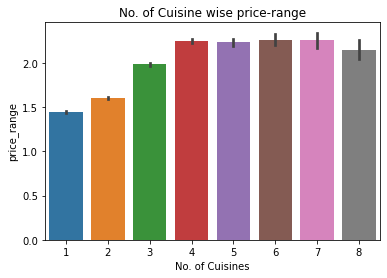

In [17]:
sns.barplot(x='No. of Cuisines',y='price_range',data=df)
plt.title('No. of Cuisine wise price-range')
plt.show()

##### Cafes providing more number of cafes have higher price range

## Average_cost_for_two

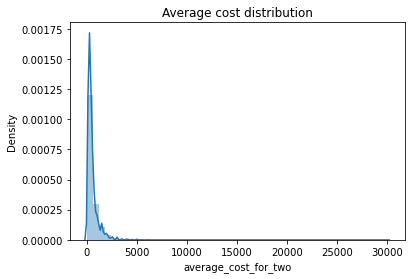

In [18]:
sns.distplot(df['average_cost_for_two'])
plt.title('Average cost distribution')
plt.show()

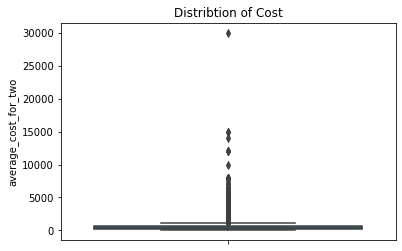

In [19]:
sns.boxplot(y='average_cost_for_two',data=df)
plt.title('Distribtion of Cost')
plt.show()

In [20]:
df['average_cost_for_two'].describe()

count    55568.000000
mean       528.205874
std        595.028447
min          0.000000
25%        200.000000
50%        350.000000
75%        600.000000
max      30000.000000
Name: average_cost_for_two, dtype: float64

#### In the above two codes,it is clearly visible, the cost column has many outliers.

Lets check the distribution of the cost with cafes having cost lesser than 1000.

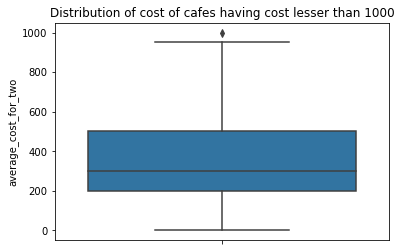

In [21]:
sns.boxplot(y='average_cost_for_two',data=df[df['average_cost_for_two']<1000])
plt.title('Distribution of cost of cafes having cost lesser than 1000')
plt.show()

The above distribution, depicts there are just few cafes, which are expensive, most of the cafes are under 600.

## Aggregate Rating

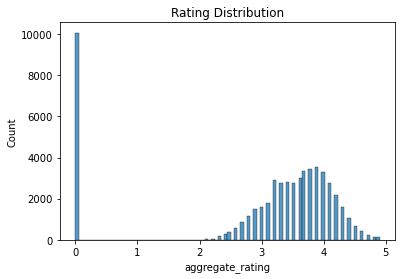

In [22]:
sns.histplot(x='aggregate_rating',data=df)
plt.title('Rating Distribution')
plt.show()

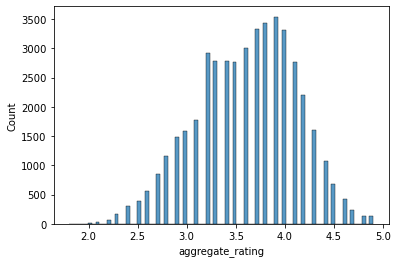

In [23]:
sns.histplot(x='aggregate_rating',data=df[df['aggregate_rating']>0])
plt.show()

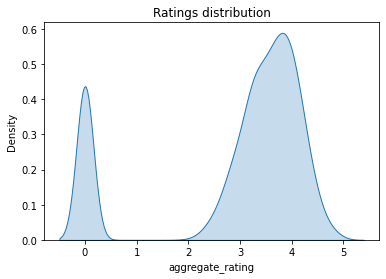

In [24]:
sns.kdeplot(df['aggregate_rating'], shade=True)
plt.title("Ratings distribution")
plt.show()

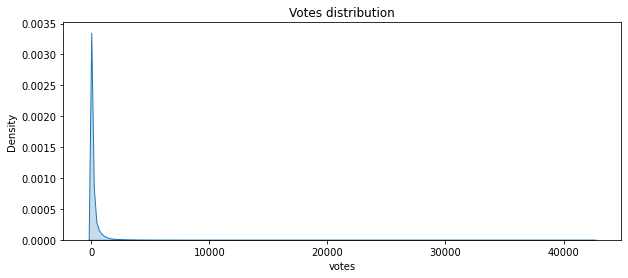

In [25]:
plt.figure(figsize=(10,4))
sns.kdeplot(df['votes'], shade=True)
plt.title("Votes distribution")
plt.show()

##### Most cafes have rating `3-4.5`

## Rating text

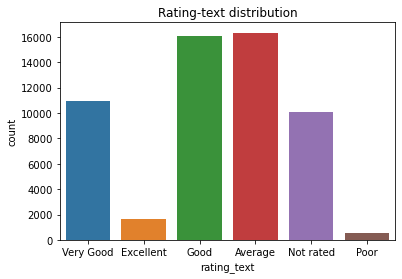

In [26]:
sns.countplot(x='rating_text',data=df)
plt.title("Rating-text distribution")
plt.show()

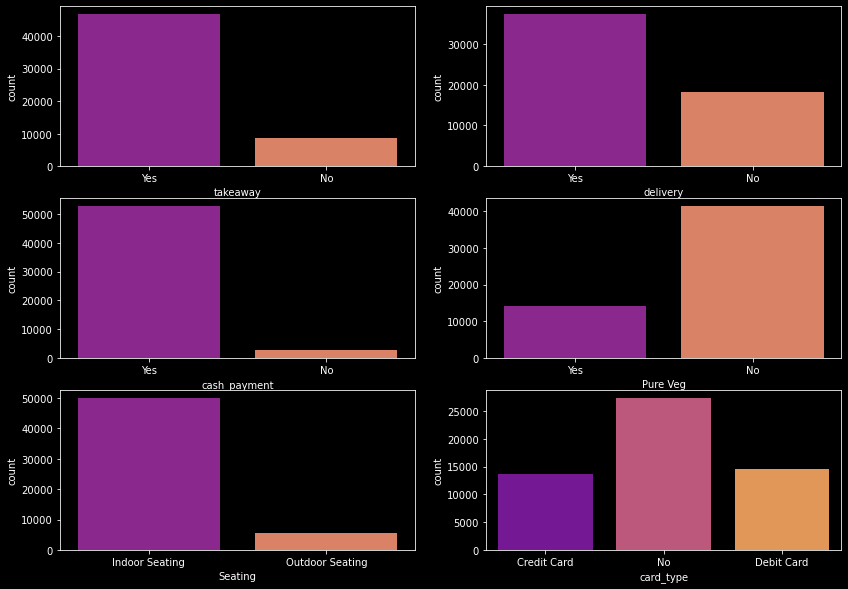

In [27]:
plt.style.use('dark_background')
figure, axis = plt.subplots(3,2,figsize=(14,10))
sns.countplot(ax=axis[0][0],x='takeaway',data=df,palette = "plasma");
sns.countplot(ax=axis[0][1],x='delivery',data=df,palette = "plasma");
sns.countplot(ax=axis[1][0],x='cash_payment',data=df,palette = "plasma");
sns.countplot(ax=axis[1][1],x='Pure Veg',data=df,palette = "plasma");
sns.countplot(ax=axis[2][0],x='Seating',data=df,palette = "plasma")
sns.countplot(ax=axis[2][1],x='card_type',data=df,palette = "plasma")
plt.show()

In [28]:
fig = make_subplots(rows=2, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}],
                                          [{'type':'domain'}, {'type':'domain'}]],subplot_titles=['Takeaway', 'Delivery','Cash Payment','Seating'])
fig.add_trace(go.Pie(labels=['yes','no'], values=df['takeaway'].value_counts(), name="Takeaway"),
              1, 1)
fig.add_trace(go.Pie(labels=['yes','no'], values=df['delivery'].value_counts(), name="Delivery"),
              1, 2)
fig.add_trace(go.Pie(labels=['yes','no'], values=df['cash_payment'].value_counts(), name="Cash Payment"),
              2, 1)
fig.add_trace(go.Pie(labels=['indoor','outdoor'], values=df['Seating'].value_counts(), name="Seating"),
              2, 2)

fig.show()

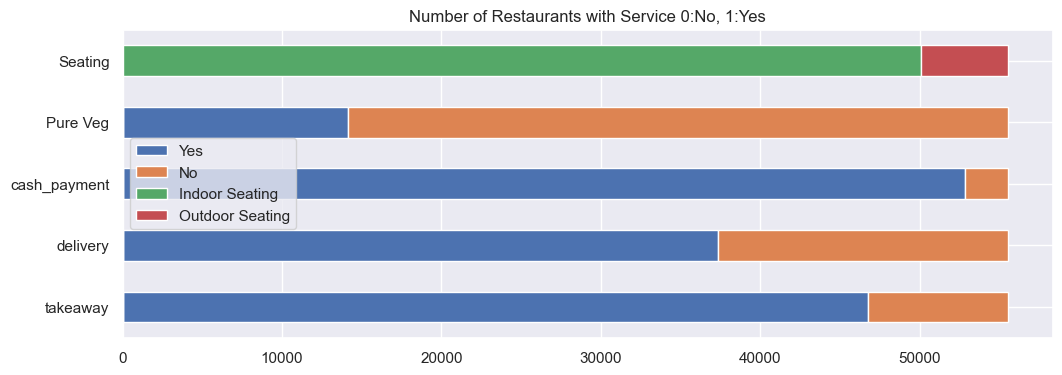

In [29]:
with plt.style.context('bmh', after_reset = True):
    sns.set(rc={'figure.figsize':(11.7,10.27)})
    plt.figure(figsize = (12,4))
    ax = plt.subplot(1,1,1)
    tmp = {}
    for col in ['takeaway', 'delivery','cash_payment','Seating','Pure Veg']: 
        tmp[col] = df[col].value_counts()
    tmp = pd.DataFrame.from_dict(tmp, orient = 'index')
    tmp.plot.barh(stacked = True, ax = ax)

    ax.set_title('Number of Restaurants with Service 0:No, 1:Yes')
    plt.show()

From the above plots, we can infer out following:
1. Around 40K cafes provide the option of takeaway while only 10K cafes dont have this option
2. Approximately, More than "37.3 K" Restaurants accepts Online Order whereas around "17.9 K" Restaurants does not accepts Online Order & 315 Restaurants dont have any status.
3. Except a few hundereds, almost all cafes accepts cash payment.
4. 15K cafes sevres PURE VEG meal, where as 35K serves non-veg or mixed type meal.
5. Around "90.2%" Restaurants provides the facility of "Indoor Seating" whereas around "9.83%" Restaurants provide the facility of "Outdoor Seating"
6. Around 14K cafes accept credit cards, same is for debit card, but more than 25K cafes do not accept any card.

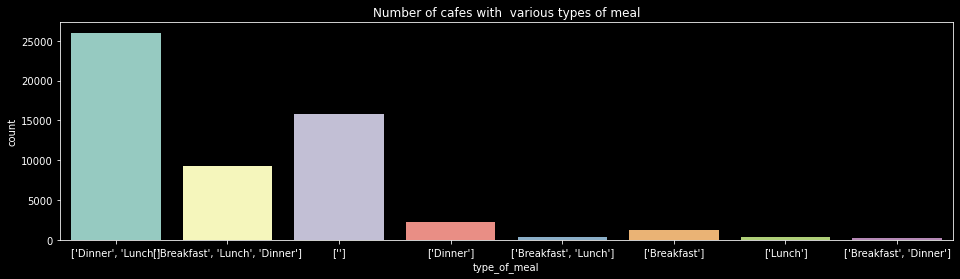

In [30]:
plt.figure(figsize=(16,4))
sns.countplot(x='type_of_meal',data=df)
plt.title('Number of cafes with  various types of meal')
plt.show()

# Exploring data Category wise

## Calculating Avg. Rating of Chained Resturant

In [31]:
df_rate=df.groupby('name')['aggregate_rating'].mean().to_frame().reset_index()
df_rate.columns = ['Restaurant', 'Avg. Rating']
df_rate

Restaurant  Avg. Rating
0                              # Wednesday          3.5
1      #1, Culinary Avenue - The Red Maple          3.9
2                              #788 Avenue          3.9
3                                      #BC          4.2
4                                    #BEiR          4.1
...                                    ...          ...
41095                    Food Street - Veg          2.9
41096                            ट 4 Tasty          3.7
41097                          द Vege टेबल          4.2
41098                            स्पेस Bar          4.3
41099                    ह-tea The Tea Hut          4.2

[41100 rows x 2 columns]

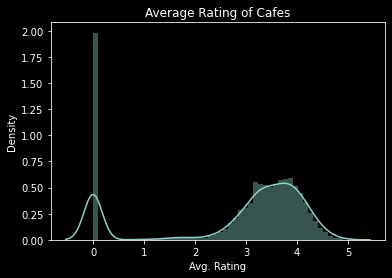

In [32]:
sns.distplot(df_rate['Avg. Rating'])
plt.title('Average Rating of Cafes')
plt.show()

Now, from this One, we can say that it is somehow `"Normally Distributed"`, but some of the "Restaurants" has "0 Ratings because, `we have already Replaced our "New" and "-" by "0"`. That's why here we have "Zero".
But from the 2nd one, we can say that we have some of the "Restaurants" that are `"Very High Rated"` (i.e. Almost "5") and almost "50 Percent" of the 'Restaurant' has a "Rating" between this "3 to 4" and "Restaurants" having More than "4.5" 'Ratings' are `"very Rare"`.

## Top Restaurant Chains in India

In [33]:
top_20_restaurant_chains = df['name'].value_counts()[0:20]
top_20_restaurant_chains.to_frame().head()

name
Domino's Pizza    399
Cafe Coffee Day   315
KFC               204
Baskin Robbins    202
Keventers         189

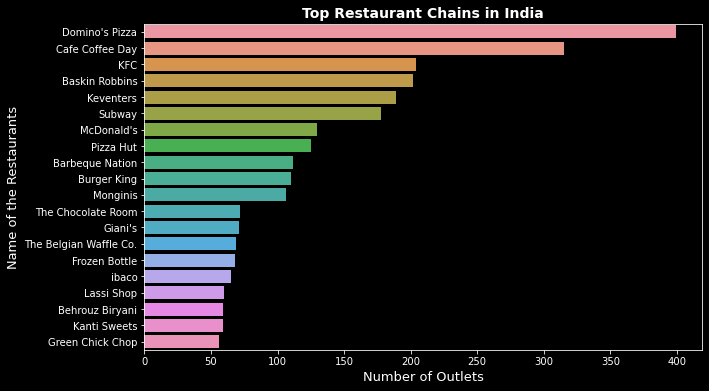

In [34]:
plt.style.use('dark_background')
plt.figure(figsize = (10, 6))
sns.barplot(x = top_20_restaurant_chains,
           y = top_20_restaurant_chains.index)

plt.title("Top Restaurant Chains in India", fontsize = 14, fontweight = 'bold')
plt.xlabel("Number of Outlets", fontsize = 13)
plt.ylabel("Name of the Restaurants", fontsize = 13)
plt.show()


Now, from this we can see that we have a `"Domimo's Pizza"` on Peak, then we have `"Cafe Coffee Day"`, then we have `"KFC"` and so on.
So, these are our "Top 20 Restaurant Chains in India".


Lets check the popularity of these top chain in the customers by thier rating.

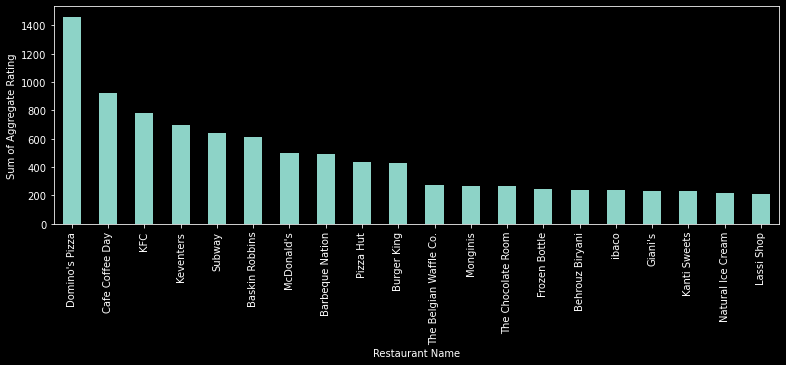

In [35]:
plt.figure(figsize=(13,4))
df.groupby('name')['aggregate_rating'].sum().nlargest(20).plot.bar()
plt.xlabel('Restaurant Name')
plt.ylabel('Sum of Aggregate Rating')
plt.show()

If we compare the above two graphs, we can infer out, that there is a bit difference in the ranking of resturants in terms of number of outlets of their chain and their rating.

As in terms of number of outlet wise, the top 5 restaurants were:

1. Domino's Pizza	
2. Cafe Coffee Day	
3. KFC	
4. Baskin Robbins	
5. Keventers	

But, rating wise,top 5 are:

1. Domino's Pizza	
2. Cafe Coffee Day	
3. KFC	
4. Keventers
5. Subway

But if we look closely, there is not a drastic change in the position, but a few restaurants have a change in their position.

Lets have a look votes wise too

In [36]:
px.bar(data_frame = df,
      x = df.groupby('name')['votes'].sum().nlargest(20).index,
      y = df.groupby('name')['votes'].sum().nlargest(20), 
      color = df.groupby('name')['votes'].sum().nlargest(20), 
      labels = {'x':'Name of the Restaurants', 'y':'Total Votes'}, 
       title = 'Highest Voted Restaurants')

Votes wise there is a remarkable change in the position of other cafes, except Domino's Pizza

## Cost wise cafes Distribution

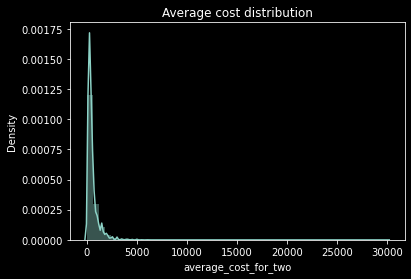

In [37]:
sns.distplot(df['average_cost_for_two'])
plt.title('Average cost distribution')
plt.show()

### Cost of the Cafe and the rating

In [38]:
px.scatter(data_frame=df,
           x='aggregate_rating',
           y='average_cost_for_two', 
           title="Approx Cost of 2 People vs Rating")

With the above plot, we can conclude that the high rated cafes are not so expensive, a very few cafes have recieved the rating above 4.5, most of the cafes are rated between 2.5 to 4, the expensive cafes do not belongs to high rated cafes.

In [39]:
px.box(data_frame=df[df['average_cost_for_two']<1000], x='delivery',
       y='average_cost_for_two')


If outliers are ignored, the cost distribution of the cafes which delivers and which do not delivers is same.

### Luxurious Restaurants

In [40]:
px.bar(data_frame=df,
      x=df.groupby('name')['average_cost_for_two'].max().nlargest(10).index,
      y=df.groupby('name')['average_cost_for_two'].max().nlargest(10),
      color=df.groupby('name')['average_cost_for_two'].max().nlargest(10))

These are the top 10 Luxurious Cafes in India.
Lets look at their votes and ratings

In [41]:
df.loc[df['name'].isin(df.groupby('name')[
    'average_cost_for_two'].max().nlargest(10).index)][['name','average_cost_for_two','votes','aggregate_rating','rating_text']]

name  average_cost_for_two  \
5146                                      Fly Dining                 14000   
16211                    Orient Express - Taj Palace                  8000   
20933            Gol Bungalow - Taj Falaknuma Palace                 15000   
20934                    Adaa - Taj Falaknuma Palace                  8000   
27256                    Risala- Umaid Bhawan Palace                 12000   
27307                  Pillars - Umaid Bhawan Palace                 12000   
27308                Trophy Bar- Umaid Bhawan Palace                 12000   
37345      Wasabi By Morimoto - The Taj Mahal Palace                 10000   
37649  Ocean - The Private Dining Room - Sahara Star                 30000   
51897                                         Bhairo                 15000   

       votes  aggregate_rating rating_text  
5146     136               3.8        Good  
16211    264               4.2   Very Good  
20933     38               3.9        Good  
20934   1087               4.5   Excellent  
27256     77               4.1   Very Good  
27307     27               3.6        Good  
27308      9               3.2     Average  
37345    616               4.3   Very Good  
37649     91               3.6        Good  
51897      6               2.9     Average

So, Among the top 10 Luxurious restaurants, `Adaa - Taj Falaknuma Palace` has highest votes and ratings	

## Budegeted Restaurants

In [42]:
df_budget = df[df['average_cost_for_two'] <= 500].loc[:,('name', 'average_cost_for_two')]
df_budget = df_budget.reset_index()
df_budget.drop(columns='index', axis=1, inplace=True)
df_budget.head()

name  average_cost_for_two
0        Bhagat Halwai                   300
1        Bhagat Halwai                   300
2       Domino's Pizza                   400
3  Honeydew Restaurant                   500
4       Domino's Pizza                   400

In [43]:
px.bar(data_frame=df_budget,
      x=df_budget['name'].head(14),
      y=df_budget['average_cost_for_two'].head(14),
      color=df_budget['name'].head(14))

In [44]:
len(df[(df['aggregate_rating'] > 4) & (df['average_cost_for_two'] <= 500)]['name'].unique())

2891

It is showing, that We have somewhere around "2891" Restaurants that are "Affordable" as well as they have good "Rating".
So, that s Final Conclusion of our Problem Statement.

## Spatial Analysis

We, have already seen the cities with most number of cafes, and found that, metropolitan cities have higher number of cafes.

Lets explore on locations, what are the most popular localities in terms of restaurants

In [45]:
restaurant_location = df['locality'].value_counts()[0:20]
restaurant_location

Civil Lines              752
Model Town               447
Shastri Nagar            392
Vijay Nagar              380
Gomti Nagar              274
Lashkar                  224
College Road             217
CIDCO                    211
Tirumala                 208
Bistupur                 204
Bedeswar                 199
Sardarpura               191
Patia                    176
Panaji                   176
MG Road                  175
Lalpur                   173
Kotecha Nagar            170
Talwandi                 169
Maharana Pratap Nagar    163
Cantt                    162
Name: locality, dtype: int64

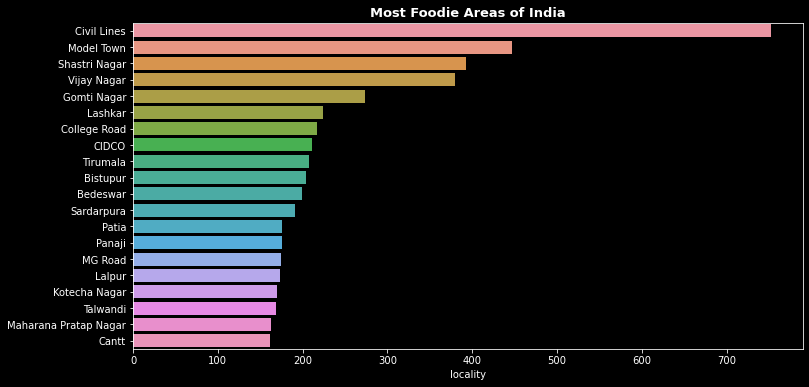

In [46]:
plt.figure(figsize=(12,6))

sns.barplot(x=restaurant_location,
           y=restaurant_location.index)

plt.title('Most Foodie Areas of India', fontsize=13, fontweight='bold')
plt.show()

From this Visualization, we can say that "civil lines", "Model town", and "Shastri nagar" has the Most Number of Restaurants. So, it means "civil lines" dominates the section by having around "752" Restaurants.

## Cuisines and Highlights

In [47]:
from wordcloud import WordCloud, STOPWORDS

In [48]:
hl = []
df["highlights"].apply(lambda x : hl.extend(x[2:-2].split("', '")))
hl = pd.Series(hl)
print("Total number of unique highlights = ", hl.nunique())

Total number of unique highlights =  104


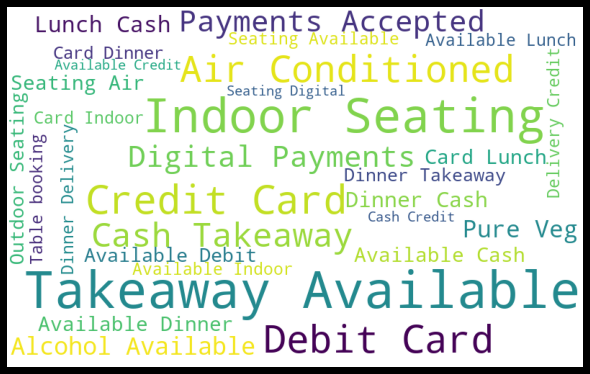

In [49]:
hl_str = ""
for i in hl:
    hl_str += str(i) + " "
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                min_font_size = 10, max_words=30).generate(hl_str) 
                         
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [50]:
hl1 = []
df["cuisines"].apply(lambda x : hl1.extend(x[2:-2].split("', '")))
hl1 = pd.Series(hl1)
print("Total number of unique cuisines = ", hl1.nunique())

Total number of unique cuisines =  9371


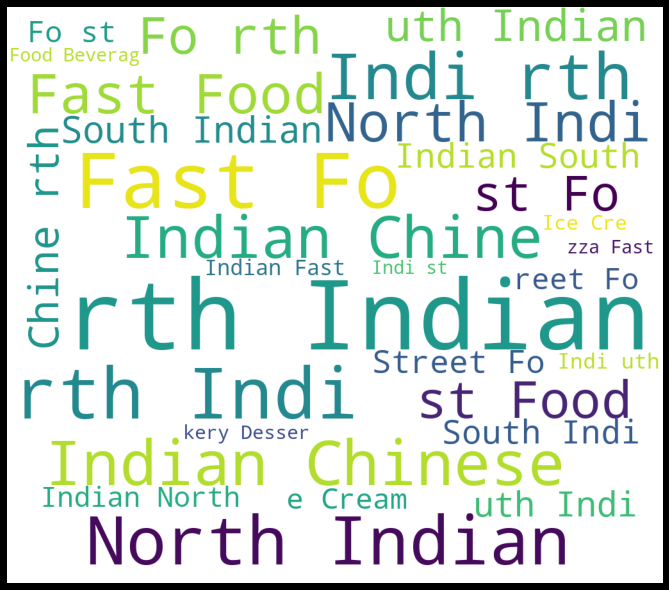

In [51]:
hl_str = ""
for i in hl1:
    hl_str += str(i) + " "
wordcloud = WordCloud(width = 1024, height = 900, 
                background_color ='white', 
                min_font_size = 10, max_words=30).generate(hl_str) 
                         
plt.figure(figsize = (10, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [52]:
df['takeaway'].replace(('yes','no'),('Yes','No'),inplace=True)
df['cash_payment'].replace(('yes','no'),('Yes','No'),inplace=True)

In [53]:
high_rated_res=df.sort_values('aggregate_rating',ascending=False).head(100)
high_rated_res.head()

res_id                                      name    establishment  \
37790  18833882           ARK 2.0 - Courtyard By Marriott              Bar   
37789  19023814             Konkani Haus Restaurant & Bar    Casual Dining   
43284   3700561               Gelateria Montecatini Terme  Dessert Parlour   
31167     22078  Girish Chandra Dey & Nakur Chandra Nandy       Sweet Shop   
15594  19043958                            Walking Street     Microbrewery   

             city  city_id                        locality   latitude  \
37790      Mumbai        3  Courtyard by Marriott, Chakala  19.113062   
37789       Thane        3       Panch Pakhadi, Thane West  19.195711   
43284  Puducherry       37                      White Town  11.925957   
31167     Kolkata        2                       Hatibagan  22.587785   
15594     Gurgaon        1                       Sector 29  28.469321   

       longitude                                           cuisines  \
37790  72.863767  Finger Food, North Indian, European, Asian, Co...   
37789  72.970992      North Indian, Maharashtrian, Mughlai, Seafood   
43284  79.834206                                           Desserts   
31167  88.367448                                             Mishti   
15594  77.062470         Bar Food, Asian, North Indian, Continental   

       average_cost_for_two  ...  rating_text votes  delivery No. of Cuisines  \
37790                  2500  ...    Excellent   248       Yes               5   
37789                   800  ...    Excellent   229       Yes               4   
43284                   150  ...    Excellent   627       Yes               1   
31167                   100  ...    Excellent  1432       Yes               1   
15594                  1500  ...    Excellent   124       Yes               4   

              type_of_meal takeaway    card_type cash_payment  \
37790  ['Dinner', 'Lunch']      Yes  Credit Card          Yes   
37789  ['Dinner', 'Lunch']      Yes  Credit Card          Yes   
43284                 ['']      Yes   Debit Card          Yes   
31167                 ['']      Yes   Debit Card          Yes   
15594           ['Dinner']      Yes   Debit Card          Yes   

               Seating Pure Veg  
37790   Indoor Seating       No  
37789   Indoor Seating       No  
43284  Outdoor Seating       No  
31167   Indoor Seating      Yes  
15594   Indoor Seating       No  

[5 rows x 23 columns]

In [54]:
# sns.countplot(x='price_range',data=high_rated_cafes)
px.bar(data_frame=high_rated_res,
      x=high_rated_res['price_range'].value_counts().index,
      y=high_rated_res['price_range'].value_counts(),
      color=high_rated_res['price_range'].value_counts().index,
      labels={'x':'Price-Range','y':'Number of Restaurants'},
      title='Number of High Rated Cafes with different Price Range')

In [55]:
# sns.countplot(x='price_range',data=high_rated_cafes)
px.bar(data_frame=high_rated_res,
      x=high_rated_res['establishment'].value_counts().index,
      y=high_rated_res['establishment'].value_counts(),
      color=high_rated_res['establishment'].value_counts().index,
      labels={'x':'Establishment','y':'Number of Restaurants'},
      title='Number of High Rated Cafes with different Establishment')

In [57]:
px.pie(high_rated_res, values=high_rated_res['type_of_meal'].value_counts(), names=high_rated_res['type_of_meal'].value_counts().index)

In [58]:
a = df.groupby('city')[['name','votes']].max().sort_values('votes',ascending = False)

In [59]:
a.head(20)

name  votes
city                                                             
Hyderabad                                          eat.fit  42539
Bangalore     re:cess - Hilton Bangalore Embassy GolfLinks  18967
New Delhi                                      Zustt Yummy  14751
Secunderabad                                  Waffle Magic  12829
Kolkata                                       Zucca Lounge  11856
Mumbai                                              edwins  10278
Chennai                                              ibaco  10171
Pune                                             स्पेस Bar   6884
Jaipur                          ta Blu - Hotel Clarks Amer   6737
Gurgaon                                            eat.fit   5958
Navi Mumbai                          Zenzibu Da Sky Lounge   4737
Lucknow                                       food parking   4614
Thane                        Zoodles - Oriental Street Wok   4542
Noida                                      Zooby's Kitchen   4316
Vizag                                                ibaco   4192
Goa                                              ट 4 Tasty   4118
Ghaziabad                                  Zaika-e-Lucknow   3762
Allahabad                                ganga sweet house   3701
Ahmedabad                             madina flight centre   3610
Indore                                 seon veg restaurant   3441

In [60]:
a.shape

(99, 2)

In [61]:
a.reset_index(inplace=True)
a

city                                          name  votes
0      Hyderabad                                       eat.fit  42539
1      Bangalore  re:cess - Hilton Bangalore Embassy GolfLinks  18967
2      New Delhi                                   Zustt Yummy  14751
3   Secunderabad                                  Waffle Magic  12829
4        Kolkata                                  Zucca Lounge  11856
..           ...                                           ...    ...
94     Alappuzha                         Ziyah Cakes and Bakes     66
95      Kolhapur       mahalaxmi Ice cream and colddrink house     52
96      Amravati                                   varadi wada     46
97      Junagadh                     test Moti Palace Township     16
98     Kharagpur                            test Vidyasagarpur      6

[99 rows x 3 columns]

In [62]:
px.bar(data_frame=a.head(20),x='name',y='votes',color='city',
      labels={'x':'restaurant_name','y':'votes'},
      title=('Top cafes in each city'))